# Image Formation in a Telescope

## Point Spread Function – PSF

**Task 1**: Calculate the PSF for a circular aperture. Assume that the telescope has a circular aperture with a radius of 128, 64, and 32, within the field of 256×256 size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2
from matplotlib.patches import RegularPolygon
from scipy.signal import convolve2d

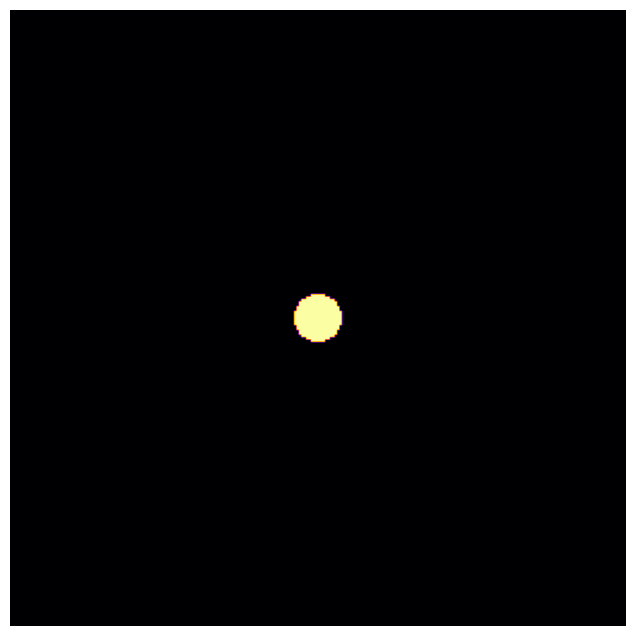

In [2]:
### A function to give us the circular aperture

def return_circular_aperture(field_size=256, aperture_radius=0):
    """
    Returns a numpy array representing a telescope's circular aperture. The aperture is centred in the field.
    
    Parameters:
    - field_size: int, pixel length of a square field, makes a field of size x size pixels
    - aperture_radius: float, radius of the circular aperture in pixels
    
    Returns:
    - aperture: 2D numpy array representing the aperture mask
    """
    y, x = np.ogrid[:field_size, :field_size]
    center = (field_size - 1) / 2
    aperture = ((x - center)**2 + (y - center)**2 <= aperture_radius**2)
    return aperture.astype(int)

### Let's see if it works
plt.figure(figsize=(8, 8))
plt.imshow(return_circular_aperture(aperture_radius=10), cmap='inferno')
plt.axis('off')
plt.grid(False)


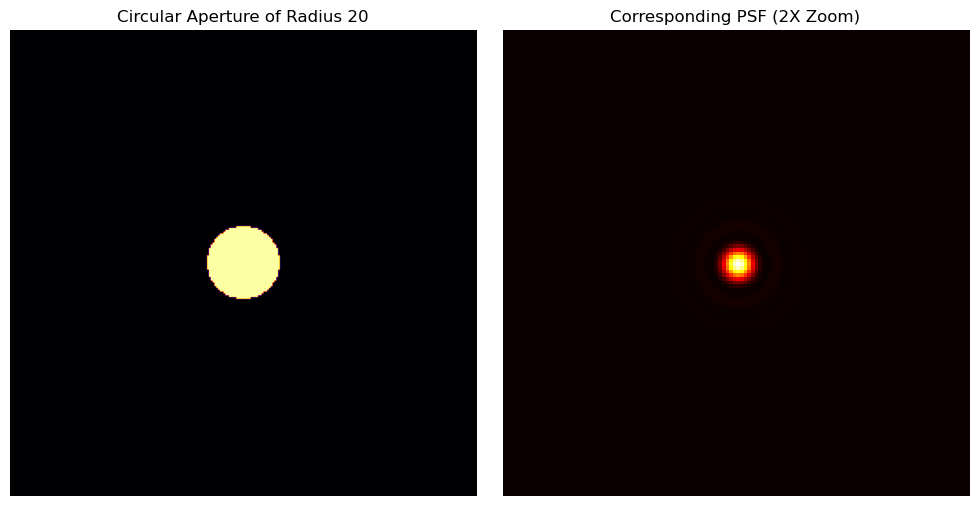

In [3]:
def return_psf(aperture):
    """
    Compute the point spread function (PSF) by Fourier transforming the aperture.
    
    Parameters:
    - aperture: 2D numpy array, the aperture mask
    
    Returns:
    - psf: 2D numpy array, the computed PSF
    """
    
    psf = (np.abs(fftshift(fft2(aperture))))**2
    psf /= psf.sum()  # Normalize
    return psf

def zoom_in(image, zoom):
    """
    Outputs the image cropped in the centre for a better view.
    """
    xdim, ydim = image.shape
    xcentre, ycentre = xdim//2, ydim//2
    xlen, ylen = round(xdim/(2*zoom)), round(ydim/(2*zoom))
    return image[ycentre-ylen:ycentre+ylen, xcentre-xlen:xcentre+xlen]
    

### Let's see if this works
example_aperture = return_circular_aperture(field_size=256, aperture_radius=20)
example_psf = return_psf(example_aperture)
log_example_psf = np.log1p(example_psf) #So we can see the finer details

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(example_aperture, cmap='inferno')
plt.title('Circular Aperture of Radius 20')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(zoom_in(log_example_psf, 2), cmap='hot')
plt.title('Corresponding PSF (2X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

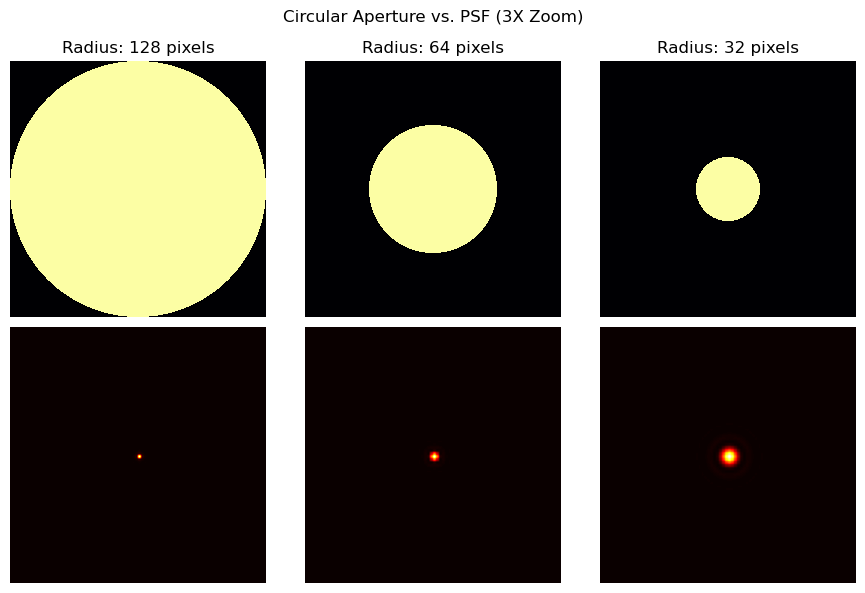

In [4]:
r_128_aperture = return_circular_aperture(aperture_radius=128)
r_64_aperture = return_circular_aperture(aperture_radius=64)
r_32_aperture = return_circular_aperture(aperture_radius=32)

r_128_psf = return_psf(r_128_aperture)
r_64_psf = return_psf(r_64_aperture)
r_32_psf = return_psf(r_32_aperture)

log_r_128_psf = np.log1p(r_128_psf)
log_r_64_psf = np.log1p(r_64_psf)
log_r_32_psf = np.log1p(r_32_psf)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))

axes[0, 0].imshow(r_128_aperture, cmap='inferno')
axes[0, 1].imshow(r_64_aperture, cmap='inferno')
axes[0, 2].imshow(r_32_aperture, cmap='inferno')

axes[1, 0].imshow(zoom_in(log_r_128_psf, 3), cmap='hot')
axes[1, 1].imshow(zoom_in(log_r_64_psf, 3), cmap='hot')
axes[1, 2].imshow(zoom_in(log_r_32_psf, 3), cmap='hot')

for ax in axes.flatten():
    ax.grid(False)
    ax.axis('off')

for ax, radius in zip(axes[0], [128, 64, 32]):
    ax.set_title('Radius: {} pixels'.format(radius))

fig.suptitle('Circular Aperture vs. PSF (3X Zoom)')

plt.tight_layout()
plt.show()

**Task 1a:** Explore how the PSF would appear in the case of other telescope mirror shapes (e.g. square, hexagonal).

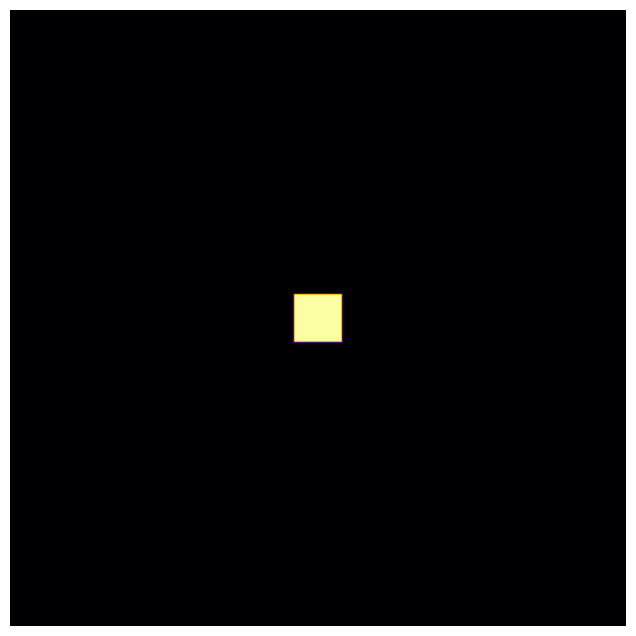

In [5]:
def return_square_aperture(field_size=256, square_length=0):
    """
    Returns a numpy array representing a telescope's square aperture. The aperture is centred in the field.
    
    Parameters:
    - field_size: int, pixel length of a square field, makes a field of size x size pixels
    - square_length: float, radius of the circular aperture in pixels
    
    Returns:
    - aperture: 2D numpy array representing the aperture mask
    """
    y, x = np.ogrid[:field_size, :field_size]
    center = (field_size - 1) / 2

    aperture = (np.abs(x - center) <+ square_length) & (np.abs(y - center) <= square_length)
    
    return aperture.astype(int)

### Let's see if it works
plt.figure(figsize=(8, 8))
plt.imshow(return_square_aperture(square_length=10), cmap='inferno')
plt.axis('off')
plt.grid(False)


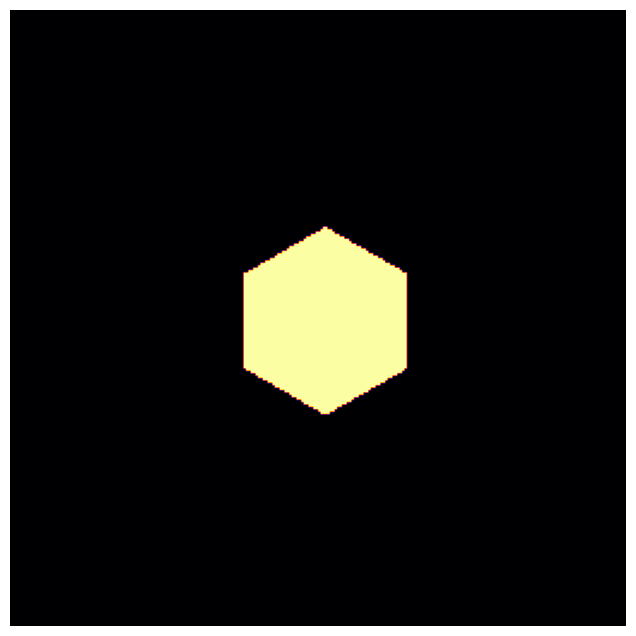

In [6]:
def return_hexagonal_aperture(field_size=256, vertice_radius=0):
    """
    Returns a numpy array representing a telescope's hexagonal aperture. The aperture is centred in the field.
    
    Parameters:
    - field_size: int, pixel length of a square field, makes a field of size x size pixels
    - vertice_radius: float, radius of the hexagonal aperture in pixels
    
    Returns:
    - aperture: 2D numpy array representing the aperture mask
    """
    center = (field_size / 2, field_size / 2)
    hex_array = np.zeros((field_size, field_size), dtype=float)

    fig, ax = plt.subplots(figsize=(field_size/100, field_size/100), dpi=100)
    ax.set_xlim(0, field_size)
    ax.set_ylim(0, field_size)
    ax.axis('off')  # Hide axes

    # Add hexagon to the axis
    hexagon = RegularPolygon(center, numVertices=6, radius=vertice_radius, edgecolor=None, facecolor='black')
    ax.add_patch(hexagon)

    # Render the plot to a NumPy array
    fig.canvas.draw()
    hex_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    hex_image = hex_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    # Convert to grayscale and normalize to get a binary mask
    hex_array = np.mean(hex_image, axis=2) < 255  # White areas become False, hexagon area becomes True
    hex_array = hex_array.astype(float)           # Convert boolean mask to float for easy use

    plt.close(fig)
    
    return hex_array

### Let's see if it works
plt.figure(figsize=(8, 8))
plt.imshow(return_hexagonal_aperture(vertice_radius=50), cmap='inferno')
plt.axis('off')
plt.grid(False)

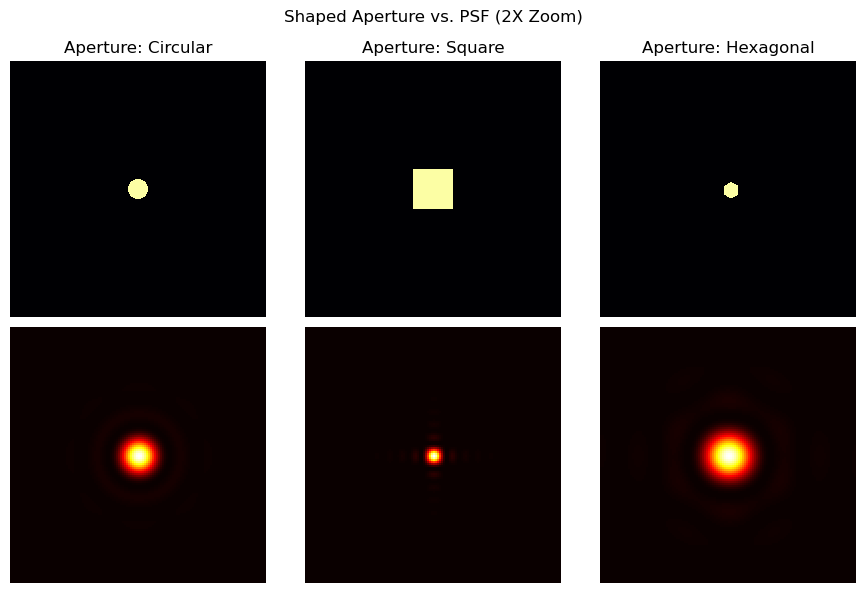

In [8]:
### Let's compare!

circular_aperture = return_circular_aperture(aperture_radius=10)
square_aperture = return_square_aperture(square_length=20)
hexagonal_aperture = return_hexagonal_aperture(vertice_radius=10)

circular_psf = return_psf(circular_aperture)
square_psf = return_psf(square_aperture)
hexagonal_psf = return_psf(hexagonal_aperture)

log_circular_psf = np.log1p(circular_psf)
log_square_psf = np.log1p(square_psf)
log_hexagonal_psf = np.log1p(hexagonal_psf)

fig, axes = plt.subplots(2, 3, figsize=(9, 6))

axes[0, 0].imshow(circular_aperture, cmap='inferno')
axes[0, 1].imshow(square_aperture, cmap='inferno')
axes[0, 2].imshow(hexagonal_aperture, cmap='inferno')

axes[1, 0].imshow(zoom_in(log_circular_psf, 2), cmap='hot')
axes[1, 1].imshow(zoom_in(log_square_psf, 2), cmap='hot')
axes[1, 2].imshow(zoom_in(log_hexagonal_psf, 2), cmap='hot')

for ax in axes.flatten():
    ax.grid(False)
    ax.axis('off')
    
for ax, radius in zip(axes[0], ['Circular', 'Square', 'Hexagonal']):
    ax.set_title('Aperture: {}'.format(radius))

fig.suptitle('Shaped Aperture vs. PSF (2X Zoom)')

plt.tight_layout()
plt.show()

## Image Formation

**Task 2:** Produce the image of any ideal source (e.g. model of an ideal star or galaxy) seen through the circular aperture (e.g. one of those created within the previous task).

In [9]:
def get_star_image(intensity=1, field_size=256, point_radius=3):
    return return_circular_aperture(field_size=field_size, aperture_radius=point_radius) * intensity

aperture = return_circular_aperture(aperture_radius=25)
psf = return_psf(aperture)
log_psf = np.log1p(psf)

star_image = get_star_image(intensity=10, field_size=256, point_radius=3)
star_convolved = convolve2d(star_image, psf, mode='same', boundary='wrap')

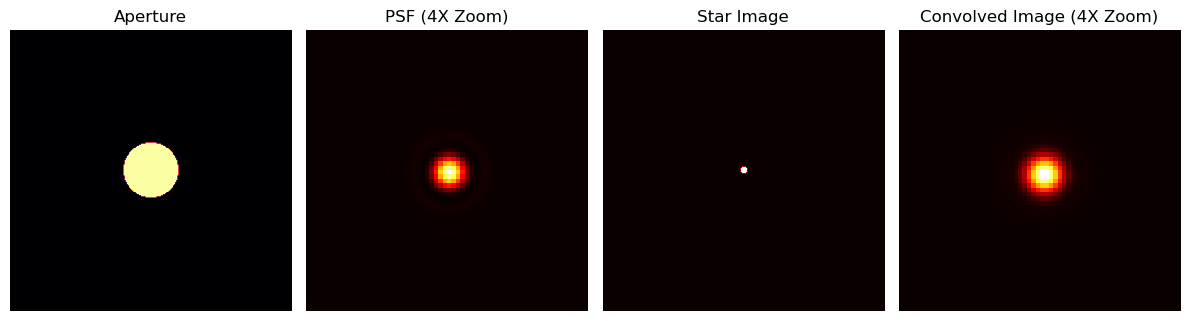

In [10]:
plt.figure(figsize=(3*4, 3*2))

plt.subplot(1, 4, 1)
plt.imshow(aperture, cmap='inferno')
plt.title('Aperture')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 2)
plt.imshow(zoom_in(log_psf, 4), cmap='hot')
plt.title('PSF (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 3)
plt.imshow(star_image, cmap='hot')
plt.title('Star Image')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 4)
plt.imshow(zoom_in(star_convolved, 4), cmap='hot')
plt.title('Convolved Image (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

In [11]:
# Function to create an extended source (e.g., a galaxy) as a Gaussian
def create_gaussian_source(grid_size, sigma=5, intensity=1.0):
    y, x = np.ogrid[:grid_size, :grid_size]
    center = grid_size // 2
    gaussian = intensity * np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))
    return gaussian

gal_image = create_gaussian_source(grid_size = 256, sigma=10)
gal_convolved = convolve2d(gal_image, psf, mode='same', boundary='wrap')

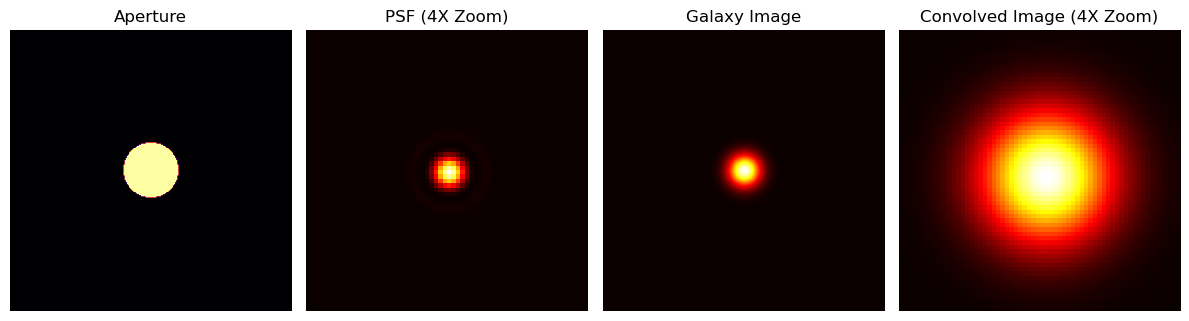

In [12]:
plt.figure(figsize=(3*4, 3*2))

plt.subplot(1, 4, 1)
plt.imshow(aperture, cmap='inferno')
plt.title('Aperture')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 2)
plt.imshow(zoom_in(log_psf, 4), cmap='hot')
plt.title('PSF (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 3)
plt.imshow(gal_image, cmap='hot')
plt.title('Galaxy Image')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 4)
plt.imshow(zoom_in(gal_convolved, 4), cmap='hot')
plt.title('Convolved Image (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

## Wavefront Perturbations and Zernike Polynomials

**Task 3:** Examin how defocusing of the optical system will affect the resulting image. Compare the obtained image with the image for a focused system.

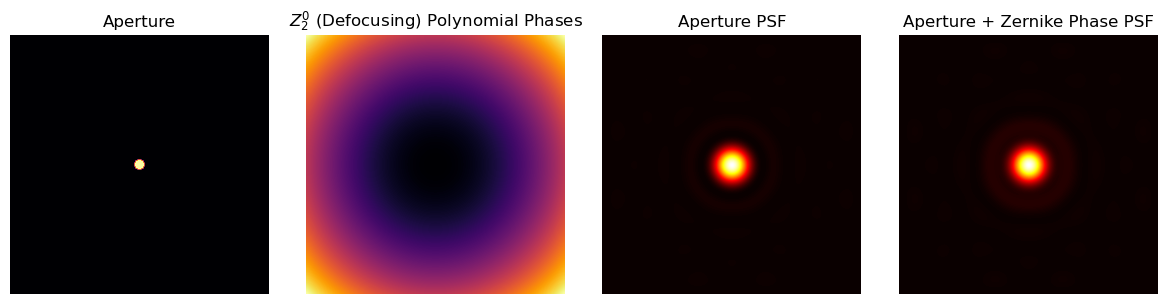

In [13]:
### Make the defocusing Zernike polynomial function

def zernike_0_2(image_shape, strength=1):
    """
    Calculates Z^2_0 phase difference image for a specific aperture size.
    
    Parameters:
    - image_shape: Touple of image shape
    - strength: The 'intensity' of the phase shift 
    
    Returns:
    - A 2D image with phase shifts
    """
    y, x = np.ogrid[-1:1:image_shape[0]*1j, -1:1:image_shape[1]*1j]
    rho_squared = x**2 + y**2
    phase_image = strength * np.sqrt(3) * ((2 * rho_squared) - 1)
    return phase_image
    

### Let's see if it works
aperture = return_circular_aperture(aperture_radius=5)
z_0_2_phase_image = zernike_0_2(aperture.shape, strength=300)
psf = return_psf(aperture)
log_psf = np.log1p(psf)

blurred_aperture = aperture * np.exp(1j * z_0_2_phase_image * aperture)
blurred_psf = return_psf(blurred_aperture)
log_blurred_psf = np.log1p(blurred_psf)

fig, axes = plt.subplots(1, 4, figsize=(3 * 4, 3 * 1))

axes[0].imshow(aperture, cmap='inferno')
axes[1].imshow(z_0_2_phase_image, cmap='inferno')
axes[2].imshow(log_psf, cmap='hot')
axes[3].imshow(log_blurred_psf, cmap='hot')

axes[0].set_title('Aperture')
axes[1].set_title('$Z^0_2$ (Defocusing) Polynomial Phases')
axes[2].set_title('Aperture PSF')
axes[3].set_title('Aperture + Zernike Phase PSF')

for ax in axes:
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

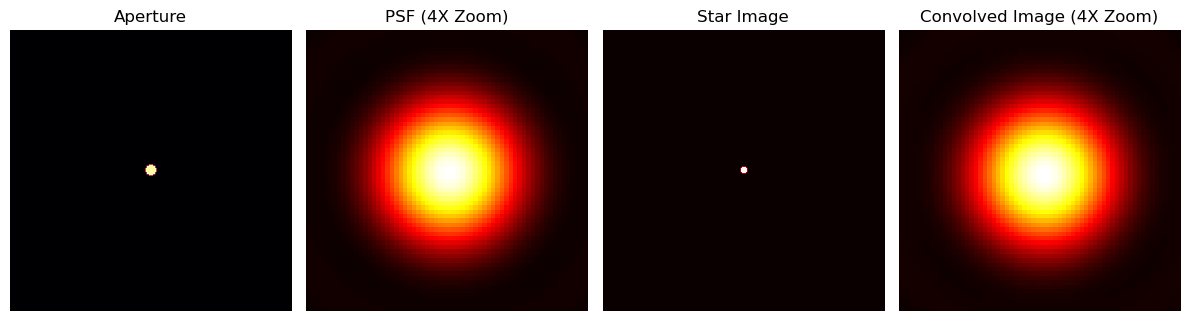

In [14]:
star_convolved = convolve2d(star_image, blurred_psf, mode='same', boundary='wrap')

plt.figure(figsize=(3*4, 3*2))

plt.subplot(1, 4, 1)
plt.imshow(aperture, cmap='inferno')
plt.title('Aperture')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 2)
plt.imshow(zoom_in(log_blurred_psf, 4), cmap='hot')
plt.title('PSF (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 3)
plt.imshow(star_image, cmap='hot')
plt.title('Star Image')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 4)
plt.imshow(zoom_in(star_convolved, 4), cmap='hot')
plt.title('Convolved Image (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

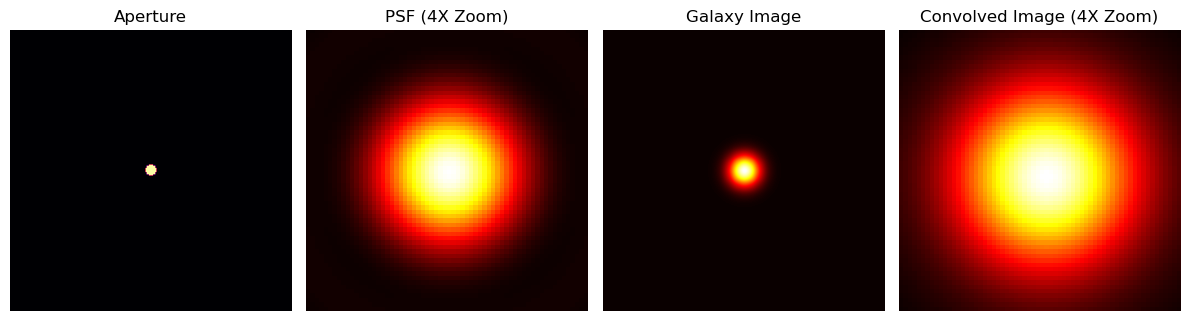

In [15]:
gal_convolved = convolve2d(gal_image, blurred_psf, mode='same', boundary='wrap')

plt.figure(figsize=(3*4, 3*2))

plt.subplot(1, 4, 1)
plt.imshow(aperture, cmap='inferno')
plt.title('Aperture')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 2)
plt.imshow(zoom_in(log_blurred_psf, 4), cmap='hot')
plt.title('PSF (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 3)
plt.imshow(gal_image, cmap='hot')
plt.title('Galaxy Image')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 4)
plt.imshow(zoom_in(gal_convolved, 4), cmap='hot')
plt.title('Convolved Image (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

**Task 4:** Consider other influences of wavefront deformation (spherical abberation, coma) on image formation. Try to create a linear combination and see how it affects the image.

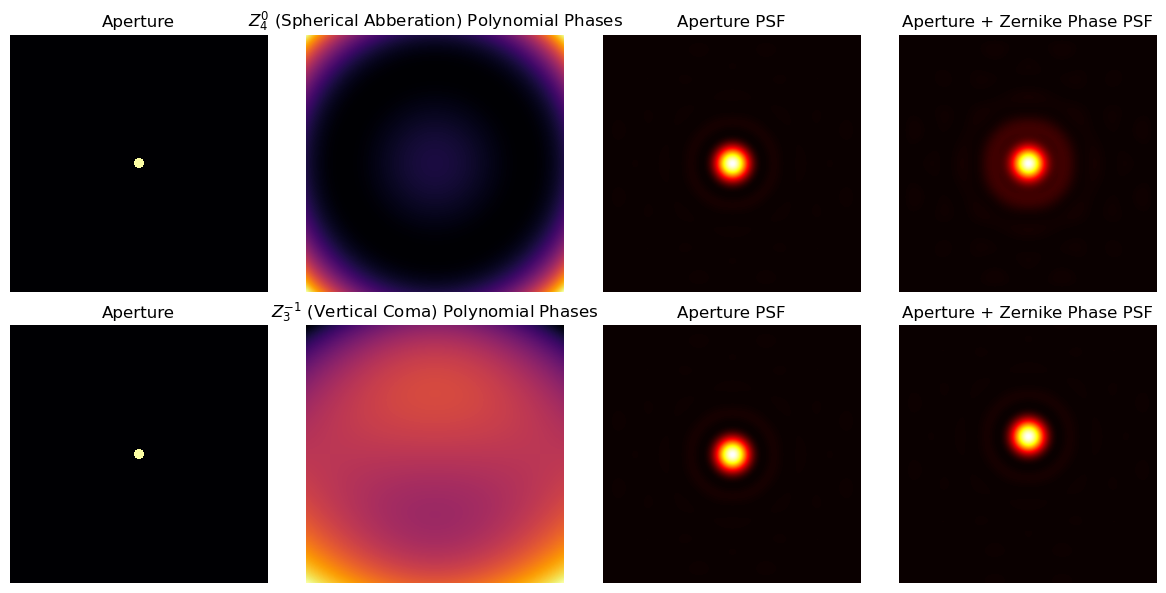

In [16]:
def zernike_0_4(image_shape, strength=1):
    """
    Calculates Z^0_4 phase difference image for a specific aperture size.
    
    Parameters:
    - image_shape: Touple of image shape
    - strength: The 'intensity' of the phase shift 
    
    Returns:
    - A 2D image with phase shifts
    """
    y, x = np.ogrid[-1:1:image_shape[0]*1j, -1:1:image_shape[1]*1j]
    rho_squared = x**2 + y**2
    phase_image = strength * np.sqrt(5) * ((6 * rho_squared**2) - (6 * rho_squared) + 1)
    return phase_image

def zernike_minus1_3(image_shape, strength=1):
    """
    Calculates Z^-1_3 phase difference image for a specific aperture size.
    
    Parameters:
    - image_shape: Touple of image shape
    - strength: The 'intensity' of the phase shift 
    
    Returns:
    - A 2D image with phase shifts
    """
    y, x = np.ogrid[-1:1:image_shape[0]*1j, -1:1:image_shape[1]*1j]
    rho = np.sqrt(x**2 + y**2)
    
    cos_phi = np.zeros(image_shape)
    for row_index in range(image_shape[0]):
        for column_index in range(image_shape[1]):
            cos_phi[column_index, row_index] = x[0, column_index] / rho[row_index, column_index]

    phase_image = strength * np.sqrt(8) * ((3 * rho**3)  - (2 * rho)) * cos_phi
    return phase_image

### Let's see if it works
aperture = return_circular_aperture(aperture_radius=5)
psf = return_psf(aperture)
log_psf = np.log1p(psf)

z_0_4_phase_image = zernike_0_4(aperture.shape, strength=110)
z_0_4_shift = aperture * z_0_4_phase_image
psf_0_4 = return_psf(aperture * np.exp(1j * z_0_4_shift))
log_psf_0_4 = np.log1p(psf_0_4)

z_minus1_3_phase_image = zernike_minus1_3(aperture.shape, strength=10)
z_minus1_3_shift = z_minus1_3_phase_image * aperture
psf_minus1_3 = return_psf(aperture * np.exp(1j * z_minus1_3_shift))
log_psf_minus1_3 = np.log1p(psf_minus1_3)

fig, axes = plt.subplots(2, 4, figsize=(3 * 4, 3 * 2))

axes[0, 0].imshow(aperture, cmap='inferno')
axes[0, 1].imshow(z_0_4_phase_image, cmap='inferno')
axes[0, 2].imshow(log_psf, cmap='hot')
axes[0, 3].imshow(log_psf_0_4, cmap='hot')

axes[0, 0].set_title('Aperture')
axes[0, 1].set_title('$Z^0_4$ (Spherical Abberation) Polynomial Phases')
axes[0, 2].set_title('Aperture PSF')
axes[0, 3].set_title('Aperture + Zernike Phase PSF')

axes[1, 0].imshow(aperture, cmap='inferno')
axes[1, 1].imshow(z_minus1_3_phase_image, cmap='inferno')
axes[1, 2].imshow(log_psf, cmap='hot')
axes[1, 3].imshow(log_psf_minus1_3, cmap='hot')

axes[1, 0].set_title('Aperture')
axes[1, 1].set_title('$Z^{-1}_3$ (Vertical Coma) Polynomial Phases')
axes[1, 2].set_title('Aperture PSF')
axes[1, 3].set_title('Aperture + Zernike Phase PSF')

for ax in axes.ravel():
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

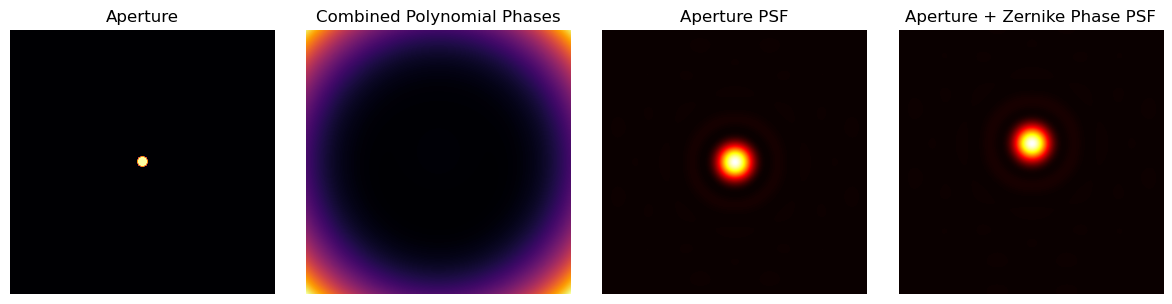

In [17]:
### Linearly combining all 3!
z_0_2_phase_image = zernike_0_2(aperture.shape, strength=300)
z_0_2_shift = aperture * z_0_2_phase_image

combined_shift = z_0_2_shift + z_0_4_shift + z_minus1_3_shift
combined_psf = return_psf(aperture * np.exp(1j * combined_shift))
log_combined_psf = np.log1p(combined_psf)

fig, axes = plt.subplots(1, 4, figsize=(3 * 4, 3 * 1))

axes[0].imshow(aperture, cmap='inferno')
axes[1].imshow(z_0_2_phase_image + z_0_4_phase_image + z_minus1_3_phase_image, cmap='inferno')
axes[2].imshow(log_psf, cmap='hot')
axes[3].imshow(log_combined_psf, cmap='hot')

axes[0].set_title('Aperture')
axes[1].set_title('Combined Polynomial Phases')
axes[2].set_title('Aperture PSF')
axes[3].set_title('Aperture + Zernike Phase PSF')

for ax in axes:
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

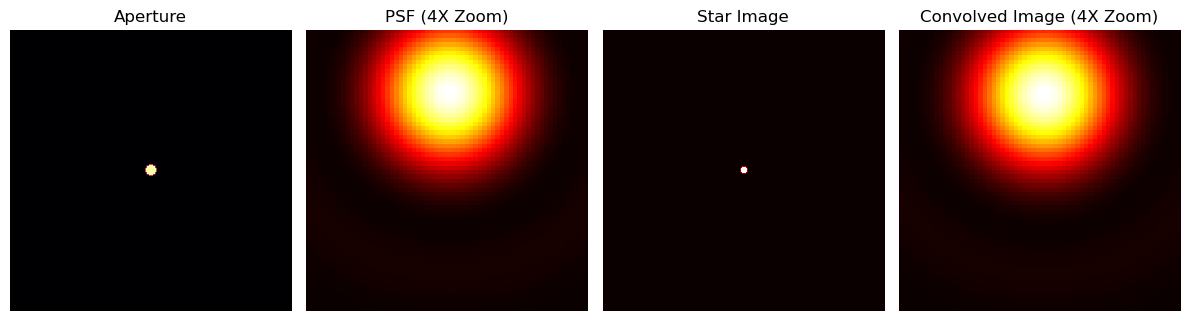

In [18]:
star_convolved = convolve2d(star_image, combined_psf, mode='same', boundary='wrap')

plt.figure(figsize=(3*4, 3*2))

plt.subplot(1, 4, 1)
plt.imshow(aperture, cmap='inferno')
plt.title('Aperture')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 2)
plt.imshow(zoom_in(log_combined_psf, 4), cmap='hot')
plt.title('PSF (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 3)
plt.imshow(star_image, cmap='hot')
plt.title('Star Image')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 4)
plt.imshow(zoom_in(star_convolved, 4), cmap='hot')
plt.title('Convolved Image (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

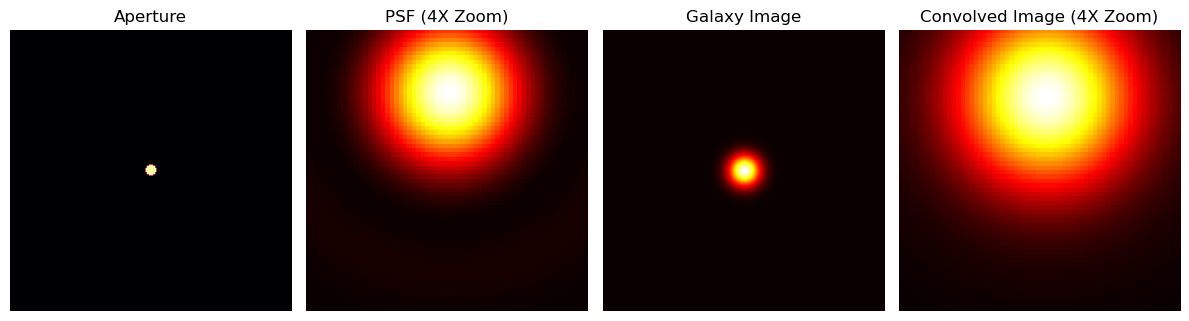

In [19]:
gal_convolved = convolve2d(gal_image, combined_psf, mode='same', boundary='wrap')

plt.figure(figsize=(3*4, 3*2))

plt.subplot(1, 4, 1)
plt.imshow(aperture, cmap='inferno')
plt.title('Aperture')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 2)
plt.imshow(zoom_in(log_combined_psf, 4), cmap='hot')
plt.title('PSF (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 3)
plt.imshow(gal_image, cmap='hot')
plt.title('Galaxy Image')
plt.axis('off')
plt.grid(False)

plt.subplot(1, 4, 4)
plt.imshow(zoom_in(gal_convolved, 4), cmap='hot')
plt.title('Convolved Image (4X Zoom)')
plt.axis('off')
plt.grid(False)

plt.tight_layout()
plt.show()

**Task 5:** Reflectors have a secondary mirror, which effectively reduces the aperture area. Compare the PSF and final image in the case of a telescope with a circular aperture (of your choice, on the same grid as in the first task) and with a central obstruction of 0.1 and 0.5 radii of the telescope's primary mirror.

In [20]:
r_128_reflector_aperture = r_128_aperture - return_circular_aperture(aperture_radius=128*0.1)
r_64_reflector_aperture = r_64_aperture - return_circular_aperture(aperture_radius=64*0.1)
r_32_reflector_aperture = r_32_aperture - return_circular_aperture(aperture_radius=32*0.1)

r_128_reflector_psf = return_psf(r_128_reflector_aperture)
r_64_reflector_psf = return_psf(r_64_reflector_aperture)
r_32_reflector_psf = return_psf(r_32_reflector_aperture)

r_128_reflector_convolved = convolve2d(star_image, r_128_reflector_psf, mode='same', boundary='wrap')
r_64_reflector_convolved = convolve2d(star_image, r_64_reflector_psf, mode='same', boundary='wrap')
r_32_reflector_convolved = convolve2d(star_image, r_32_reflector_psf, mode='same', boundary='wrap')

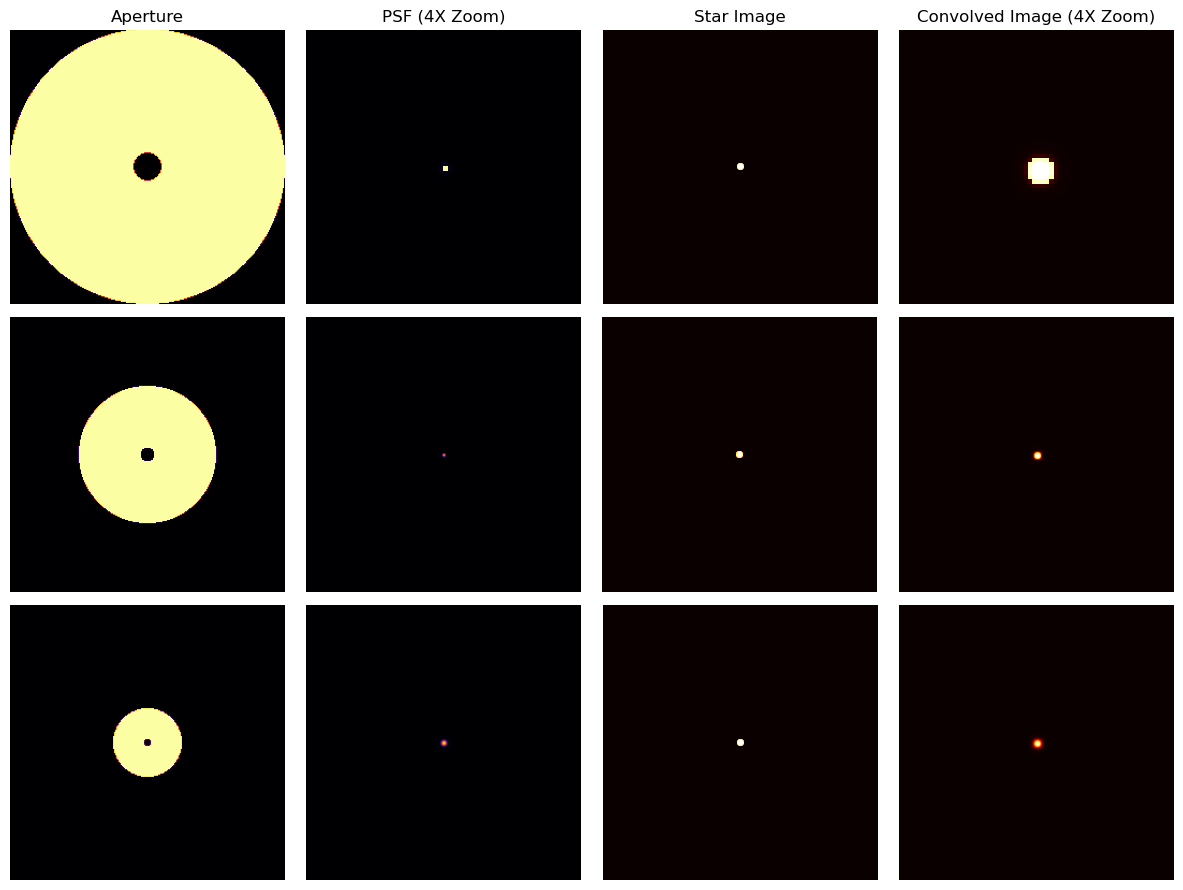

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(3 * 4, 3 * 3))

axes[0, 0].imshow(r_128_reflector_aperture, cmap='inferno')
axes[0, 1].imshow(zoom_in(np.log1p(r_128_reflector_psf), 4), cmap='inferno')
axes[0, 2].imshow(star_image, cmap='hot')
axes[0, 3].imshow(zoom_in(r_128_reflector_convolved, 4), cmap='hot')

axes[0, 0].set_title('Aperture')
axes[0, 1].set_title('PSF (4X Zoom)')
axes[0, 2].set_title('Star Image')
axes[0, 3].set_title('Convolved Image (4X Zoom)')

axes[1, 0].imshow(r_64_reflector_aperture, cmap='inferno')
axes[1, 1].imshow(np.log1p(r_64_reflector_psf), cmap='inferno')
axes[1, 2].imshow(star_image, cmap='hot')
axes[1, 3].imshow(r_64_reflector_convolved, cmap='hot')

axes[2, 0].imshow(r_32_reflector_aperture, cmap='inferno')
axes[2, 1].imshow(np.log1p(r_32_reflector_psf), cmap='inferno')
axes[2, 2].imshow(star_image, cmap='hot')
axes[2, 3].imshow(r_32_reflector_convolved, cmap='hot')

for ax in axes.ravel():
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()

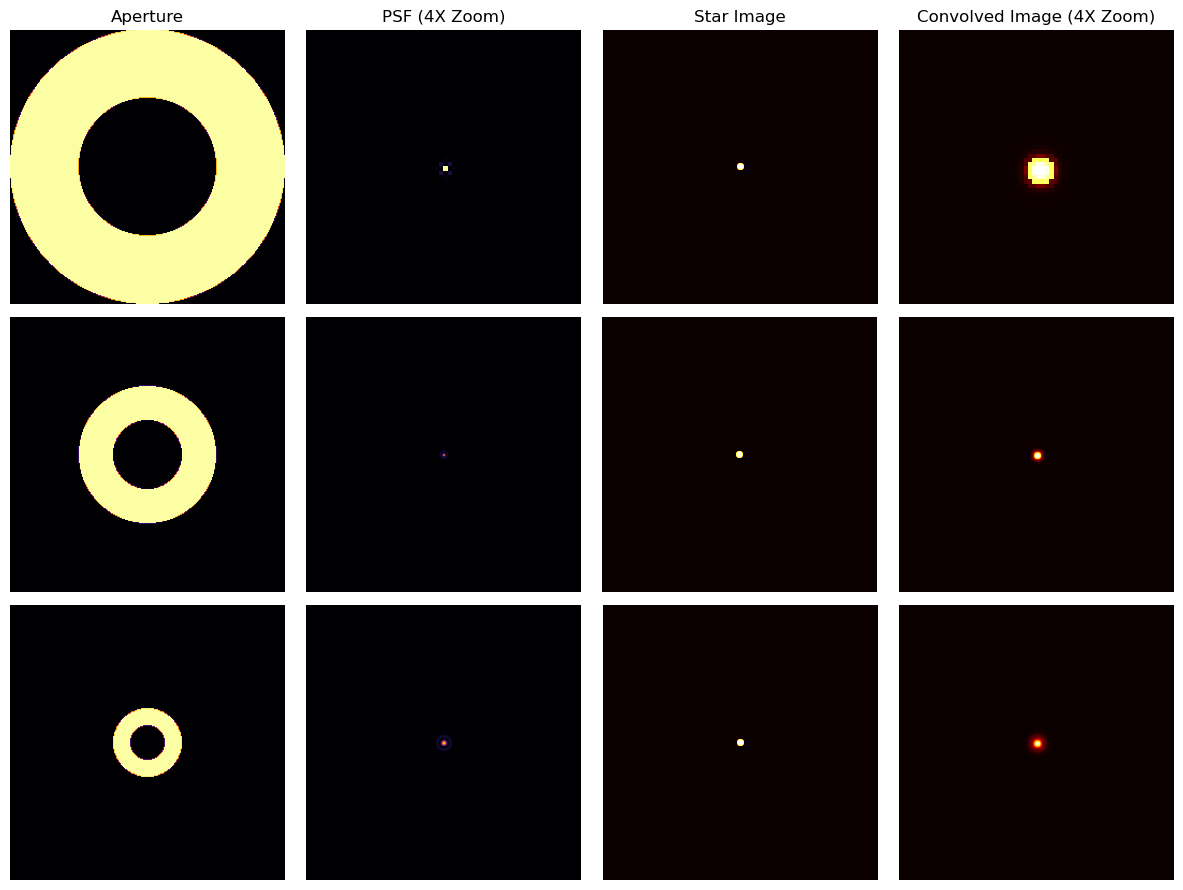

In [22]:
r_128_reflector_aperture = r_128_aperture - return_circular_aperture(aperture_radius=128*0.5)
r_64_reflector_aperture = r_64_aperture - return_circular_aperture(aperture_radius=64*0.5)
r_32_reflector_aperture = r_32_aperture - return_circular_aperture(aperture_radius=32*0.5)

r_128_reflector_psf = return_psf(r_128_reflector_aperture)
r_64_reflector_psf = return_psf(r_64_reflector_aperture)
r_32_reflector_psf = return_psf(r_32_reflector_aperture)

r_128_reflector_convolved = convolve2d(star_image, r_128_reflector_psf, mode='same', boundary='wrap')
r_64_reflector_convolved = convolve2d(star_image, r_64_reflector_psf, mode='same', boundary='wrap')
r_32_reflector_convolved = convolve2d(star_image, r_32_reflector_psf, mode='same', boundary='wrap')

fig, axes = plt.subplots(3, 4, figsize=(3 * 4, 3 * 3))

axes[0, 0].imshow(r_128_reflector_aperture, cmap='inferno')
axes[0, 1].imshow(zoom_in(np.log1p(r_128_reflector_psf), 4), cmap='inferno')
axes[0, 2].imshow(star_image, cmap='hot')
axes[0, 3].imshow(zoom_in(r_128_reflector_convolved, 4), cmap='hot')

axes[0, 0].set_title('Aperture')
axes[0, 1].set_title('PSF (4X Zoom)')
axes[0, 2].set_title('Star Image')
axes[0, 3].set_title('Convolved Image (4X Zoom)')

axes[1, 0].imshow(r_64_reflector_aperture, cmap='inferno')
axes[1, 1].imshow(np.log1p(r_64_reflector_psf), cmap='inferno')
axes[1, 2].imshow(star_image, cmap='hot')
axes[1, 3].imshow(r_64_reflector_convolved, cmap='hot')

axes[2, 0].imshow(r_32_reflector_aperture, cmap='inferno')
axes[2, 1].imshow(np.log1p(r_32_reflector_psf), cmap='inferno')
axes[2, 2].imshow(star_image, cmap='hot')
axes[2, 3].imshow(r_32_reflector_convolved, cmap='hot')

for ax in axes.ravel():
    ax.grid(False)
    ax.axis('off')

plt.tight_layout()
plt.show()